In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("SAP-4000.csv")
data.head()

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,Male,5.5,No,Urban,72.7,Tertiary,43.5
1,Female,6.8,No,Urban,62.0,Primary,51.7
2,Female,9.7,No,Rural,95.0,Secondary,70.1
3,Male,13.3,Yes,Rural,52.9,NaN,79.5
4,Female,8.9,No,Urban,50.8,NaN,52.2


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             4000 non-null   object 
 1   HoursStudied/Week  4000 non-null   float64
 2   Tutoring           4000 non-null   object 
 3   Region             4000 non-null   object 
 4   Attendance(%)      4000 non-null   float64
 5   Parent Education   3578 non-null   object 
 6   Exam_Score         4000 non-null   float64
dtypes: float64(3), object(4)
memory usage: 218.9+ KB


In [3]:
data["HoursStudied/Week"].head()

0     5.5
1     6.8
2     9.7
3    13.3
4     8.9
Name: HoursStudied/Week, dtype: float64

In [65]:
study_hours_data = data["HoursStudied/Week"]
study_hours_data.head()

0     5.5
1     6.8
2     9.7
3    13.3
4     8.9
Name: HoursStudied/Week, dtype: float64

In [67]:
median_value = study_hours_data.median()
print(f"Median value: {median_value}")
mean_value = study_hours_data.mean()
print(f"Mean value:  {mean_value}")
variance_value = study_hours_data.var() # square of std_value
print(f"Variance value: {variance_value}")
std_value = study_hours_data.std() # square root of variance_value
print(f"Standart deviation value: {std_value}")
standart_error_value = std_value / np.sqrt(len(study_hours_data)) # std diveded by square root of n
print(f"Standart error value: {standart_error_value}")

Median value: 9.9
Mean value:  9.861025
Variance value: 13.792316528507284
Standart deviation value: 3.713800819713853
Standart error value: 0.05872034683248066


In [69]:
Q1 = study_hours_data.quantile(0.25)
Q3 = study_hours_data.quantile(0.75)
IQR = Q3 - Q1
min_val = study_hours_data.min()
max_val = study_hours_data.max()

print(f"\nDescriptive stats for interpretation assistance:")
print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value:.2f}")
print(f"Min: {min_val:.2f}")
print(f"Max: {max_val:.2f}")
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")

# Outlier check based on 1.5*IQR rule
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_lower = study_hours_data[study_hours_data < lower_bound]
outliers_upper = study_hours_data[study_hours_data > upper_bound]

print(f"Potential lower outliers (below {lower_bound:.2f}): {len(outliers_lower)} values. Examples: {outliers_lower.unique()[:5]}")
print(f"Potential upper outliers (above {upper_bound:.2f}): {len(outliers_upper)} values. Examples: {outliers_upper.unique()[:5]}")


Descriptive stats for interpretation assistance:
Mean: 9.86
Median: 9.90
Min: 0.00
Max: 16.00
Q1: 7.40
Q3: 12.60
IQR: 5.20
Potential lower outliers (below -0.40): 0 values. Examples: []
Potential upper outliers (above 20.40): 0 values. Examples: []


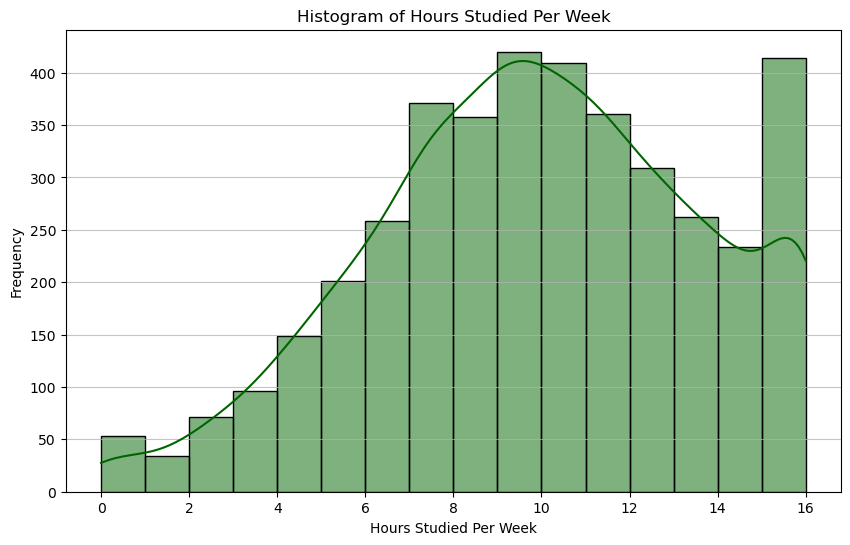

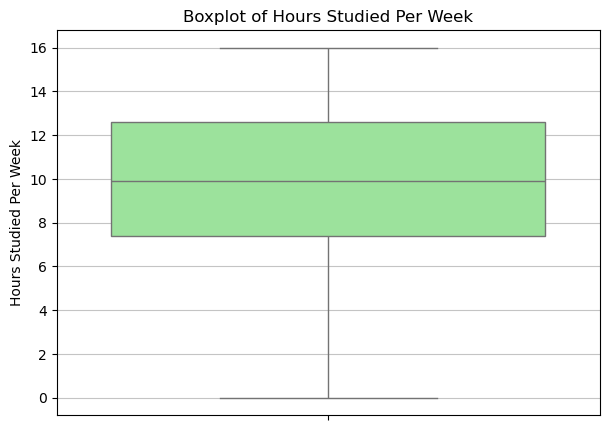

In [71]:
# 1. Create a Histogram
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(study_hours_data, bins=16, kde=True, color='darkgreen', edgecolor='black')

plt.title('Histogram of Hours Studied Per Week')
plt.xlabel('Hours Studied Per Week')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# 2. Create a Boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(y=study_hours_data, color='lightgreen')

plt.title('Boxplot of Hours Studied Per Week')
plt.ylabel('Hours Studied Per Week')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [72]:
from scipy import stats 

# 3. Confidence Interval for the Population Mean
confidence_level_mean = 0.95
alpha_mean = 1 - confidence_level_mean
degrees_freedom_mean = len(study_hours_data) - 1

z_critical_mean = stats.norm.ppf(1 - alpha_mean / 2) # gives a z value

margin_of_error_mean = z_critical_mean * standart_error_value # z * (std / square root of sample size)
ci_mean_lower = mean_value - margin_of_error_mean
ci_mean_upper = mean_value + margin_of_error_mean

print(f"Assumptions for CI of the Mean:")
print(f"  - Sample is random.")
print(f"  - Sample size n={len(study_hours_data)} is large (>=30), so Central Limit Theorem applies,")
print(f"    allowing approximation of sampling distribution of the mean to normal.")
print(f"    (Or, population is normally distributed).")

print(f"\n95% Confidence Interval for Population Mean (μ):")
print(f"  Sample Mean: {mean_value:.3f}")
print(f"  Standard Error of the Mean (SEM): {standart_error_value:.3f}")
print(f"  Z-critical value for {confidence_level_mean*100}% CI: {z_critical_mean:.3f}")
print(f"  Margin of Error (ME) for mean: {margin_of_error_mean:.3f}")
print(f"  Confidence Interval: [{ci_mean_lower:.3f}, {ci_mean_upper:.3f}] hours/week")
print(f"  Interpretation: We are 95% confident that the true average number of hours studied per week")
print(f"  by the population of students lies between {ci_mean_lower:.3f} and {ci_mean_upper:.3f} hours.")


# 4. Confidence Interval for the Population Variance
confidence_level_var = 0.95
alpha_var = 1 - confidence_level_var
degrees_freedom_var = len(study_hours_data) - 1 # This is df for chi-square distribution

# Chi-square critical values
# Upper critical value (for the denominator of the lower bound of the CI)
chi2_upper_critical = stats.chi2.ppf(1 - alpha_var / 2, degrees_freedom_var)
# Lower critical value (for the denominator of the upper bound of the CI)
chi2_lower_critical = stats.chi2.ppf(alpha_var / 2, degrees_freedom_var)

# Calculate CI for variance
ci_var_lower = (degrees_freedom_var * variance_value) / chi2_upper_critical
ci_var_upper = (degrees_freedom_var * variance_value) / chi2_lower_critical

print(f"\nAssumptions for CI of the Variance:")
print(f"  - Sample is random.")
print(f"  - The population from which the sample is drawn is normally distributed.")
print(f"    (This assumption is more critical for variance CI than for mean CI with large n).")

print(f"\n95% Confidence Interval for Population Variance (σ^2):")
print(f"  Sample Variance (s^2): {variance_value:.3f}")
print(f"  Degrees of Freedom (df): {degrees_freedom_var}")
print(f"  Chi2-critical (α/2, df) [lower tail for CI_upper]: {chi2_lower_critical:.3f}")
print(f"  Chi2-critical (1-α/2, df) [upper tail for CI_lower]: {chi2_upper_critical:.3f}")
print(f"  Confidence Interval: [{ci_var_lower:.3f}, {ci_var_upper:.3f}] hours^2/week^2")
print(f"  Interpretation: We are 95% confident that the true population variance of weekly study hours")
print(f"  lies between {ci_var_lower:.3f} and {ci_var_upper:.3f} hours-squared per week-squared.")


# Take the square root of the CI for variance bounds
ci_std_dev_lower = np.sqrt(ci_var_lower)
ci_std_dev_upper = np.sqrt(ci_var_upper)
print(f"\n95% Confidence Interval for Population Standard Deviation (σ):")
print(f"  Confidence Interval: [{ci_std_dev_lower:.3f}, {ci_std_dev_upper:.3f}] hours/week")

Assumptions for CI of the Mean:
  - Sample is random.
  - Sample size n=4000 is large (>=30), so Central Limit Theorem applies,
    allowing approximation of sampling distribution of the mean to normal.
    (Or, population is normally distributed).

95% Confidence Interval for Population Mean (μ):
  Sample Mean: 9.861
  Standard Error of the Mean (SEM): 0.059
  Z-critical value for 95.0% CI: 1.960
  Margin of Error (ME) for mean: 0.115
  Confidence Interval: [9.746, 9.976] hours/week
  Interpretation: We are 95% confident that the true average number of hours studied per week
  by the population of students lies between 9.746 and 9.976 hours.

Assumptions for CI of the Variance:
  - Sample is random.
  - The population from which the sample is drawn is normally distributed.
    (This assumption is more critical for variance CI than for mean CI with large n).

95% Confidence Interval for Population Variance (σ^2):
  Sample Variance (s^2): 13.792
  Degrees of Freedom (df): 3999
  Chi2-cr

In [75]:
# 5. Sample Size Estimation
ME = 0.1  # margin of error
confidence_level_sample_size = 0.90

# Z-value
alpha_sample_size = 1 - confidence_level_sample_size
z_critical_sample_size = stats.norm.ppf(1 - alpha_sample_size / 2)

# Use the std_value that we find before
sigma_estimate = std_value 

# Apply the formula
n_calculated = ((z_critical_sample_size * sigma_estimate) / ME )**2

n_final = np.ceil(n_calculated)

print(f"7. Sample Size Estimation for Population Mean (Hours Studied/Week):")
print(f"------------------------------------------------------------------")
print(f"  Desired Maximum Margin of Error (ME): {ME} hours/week")
print(f"  Confidence Level: {confidence_level_sample_size*100:.1f}%")
print(f"  Z-critical value for {confidence_level_sample_size*100:.1f}% CI: {z_critical_sample_size:.3f}")
print(f"  Estimated Population Standard Deviation (σ, using sample s): {sigma_estimate:.3f} hours/week")
print(f"  Calculated sample size (n_calculated): {n_calculated:.2f}")
print(f"  Minimum Required Sample Size (n_final, rounded up): {int(n_final)}")
print(f"\nMethod Explanation:")
print(f"  The formula n = (Z * σ / ME)² was used.")
print(f"  - Z ({z_critical_sample_size:.3f}) is the critical value for a {confidence_level_sample_size*100:.0f}% confidence level.")
print(f"  - σ ({sigma_estimate:.3f}) is the estimated population standard deviation, based on the standard deviation of the 'HoursStudied/Week' column from our dataset.")
print(f"  - ME ({ME}) is the maximum acceptable margin of error.")
print(f"  The result is rounded up to the nearest whole number ({int(n_final)}) because sample size must be an integer and we need to ensure the margin of error is at most {ME}.")


7. Sample Size Estimation for Population Mean (Hours Studied/Week):
------------------------------------------------------------------
  Desired Maximum Margin of Error (ME): 0.1 hours/week
  Confidence Level: 90.0%
  Z-critical value for 90.0% CI: 1.645
  Estimated Population Standard Deviation (σ, using sample s): 3.714 hours/week
  Calculated sample size (n_calculated): 3731.57
  Minimum Required Sample Size (n_final, rounded up): 3732

Method Explanation:
  The formula n = (Z * σ / ME)² was used.
  - Z (1.645) is the critical value for a 90% confidence level.
  - σ (3.714) is the estimated population standard deviation, based on the standard deviation of the 'HoursStudied/Week' column from our dataset.
  - ME (0.1) is the maximum acceptable margin of error.
  The result is rounded up to the nearest whole number (3732) because sample size must be an integer and we need to ensure the margin of error is at most 0.1.


In [100]:
# 6.1. First Hypothesis Test (One-Sample t-test: μ = 10.0 hours)
print(f"\n8.1. Hypothesis Testing (One-Sample t-test: μ = 10.0 hours)")
print(f"-------------------------------------------------------------------")

mu_0_test1 = 10.0
print(f"Null Hypothesis (H₀): The population mean of weekly study hours (μ) = {mu_0_test1} hours.")
print(f"Alternative Hypothesis (H₁): The population mean of weekly study hours (μ) ≠ {mu_0_test1} hours (two-tailed test).")
alpha_hyp = 0.05
print(f"Significance Level (α): {alpha_hyp}")

t_statistic_test1, p_value_test1_two_tailed = stats.ttest_1samp(a=study_hours_data, popmean=mu_0_test1) # p_value iki kuyruklu

print(f"\n--- Test Statistics (μ₀ = {mu_0_test1}) ---")
print(f"  Sample Mean (x̄): {mean_value:.3f} hours/week")
print(f"  Standard Error of the Mean (SEM): {standart_error_value:.3f}")
print(f"  Calculated t-statistic: {t_statistic_test1:.3f}")
print(f"  P-value (two-tailed): {p_value_test1_two_tailed:.4f}") # İki kuyruklu olarak belirtelim

print(f"\n--- Decision (μ₀ = {mu_0_test1}) ---")
if p_value_test1_two_tailed < alpha_hyp: # Karşılaştırma iki kuyruklu p-değeri ile
    decision_test1 = f"Reject H₀. (P-value {p_value_test1_two_tailed:.4f} < α {alpha_hyp})"
    conclusion_text_test1 = (f"There is statistically significant evidence to conclude that the population mean "
                       f"of weekly study hours is different from {mu_0_test1} hours.")
else:
    decision_test1 = f"Fail to reject H₀. (P-value {p_value_test1_two_tailed:.4f} >= α {alpha_hyp})"
    conclusion_text_test1 = (f"There is not enough statistically significant evidence to conclude that the population mean "
                       f"of weekly study hours is different from {mu_0_test1} hours.")
print(decision_test1)

print(f"\n--- Interpretation of Results (μ₀ = {mu_0_test1}) ---")
print(conclusion_text_test1)
if p_value_test1_two_tailed < alpha_hyp:
    if mean_value > mu_0_test1:
        print(f"  Specifically, the sample mean ({mean_value:.3f} hours) is statistically significantly "
              f"higher than the hypothesized mean of {mu_0_test1} hours (at α={alpha_hyp} level).")
    elif mean_value < mu_0_test1:
        print(f"  Specifically, the sample mean ({mean_value:.3f} hours) is statistically significantly "
              f"lower than the hypothesized mean of {mu_0_test1} hours (at α={alpha_hyp} level).")

#----------------------------------------------------------------------------------------------------------------
print("\n" + "-"*100 + "\n")
#----------------------------------------------------------------------------------------------------------------

# 6.2. Second Hypothesis Test (One-Sample t-test: μ > 8.0 hours - Right-tailed)

print(f"\n8.2. Hypothesis Testing (One-Sample t-test: μ > 8.0 hours - Right-tailed)")
print(f"-----------------------------------------------------------------------")

# --- Define Hypotheses ---
mu_0_test2 = 8.0  # Hypothesized population mean for the one-sided test

print(f"Null Hypothesis (H₀): The population mean of weekly study hours (μ) ≤ {mu_0_test2} hours.")
print(f"Alternative Hypothesis (H₁): The population mean of weekly study hours (μ) > {mu_0_test2} hours (right-tailed test).")

# --- Choose Significance Level (α) ---
print(f"Significance Level (α): {alpha_hyp}")

# --- Calculate the Test Statistic and P-value ---
t_statistic_test2, p_value_two_tailed_test2 = stats.ttest_1samp(a=study_hours_data, popmean=mu_0_test2)

# Adjust p-value for a right-tailed test
if t_statistic_test2 > 0: # If sample mean is greater than hypothesized mean (consistent with H1)
    p_value_one_tailed_test2 = p_value_two_tailed_test2 / 2
else: # If sample mean is less than or equal to hypothesized mean (not consistent with H1: μ > 8.0)
    p_value_one_tailed_test2 = 1 - (p_value_two_tailed_test2 / 2)

print(f"\n--- Test Statistics (H₀: μ ≤ {mu_0_test2}, H₁: μ > {mu_0_test2}) ---")
print(f"  Sample Mean (x̄): {mean_value:.3f} hours/week")
print(f"  Standard Error of the Mean (SEM): {standart_error_value:.3f}")
print(f"  Calculated t-statistic: {t_statistic_test2:.3f}")
print(f"  P-value (one-tailed, right): {p_value_one_tailed_test2:.4f}")

# --- Make a Decision ---
print(f"\n--- Decision (H₁: μ > {mu_0_test2}) ---")
if p_value_one_tailed_test2 < alpha_hyp and t_statistic_test2 > 0: # For H1: μ > μ0, t must be positive
    decision_test2 = f"Reject H₀. (P-value {p_value_one_tailed_test2:.4f} < α {alpha_hyp} and t-statistic is positive)"
    conclusion_text_test2 = (f"There is statistically significant evidence to conclude that the population mean "
                       f"of weekly study hours is greater than {mu_0_test2} hours.")
else:
    decision_test2 = f"Fail to reject H₀. (P-value {p_value_one_tailed_test2:.4f} >= α {alpha_hyp} or t-statistic is not in the direction of H₁)"
    conclusion_text_test2 = (f"There is not enough statistically significant evidence to conclude that the population mean "
                       f"of weekly study hours is greater than {mu_0_test2} hours.")
print(decision_test2)

# --- Interpret the Results in the Context of the Data ---
print(f"\n--- Interpretation of Results (H₁: μ > {mu_0_test2}) ---")
print(conclusion_text_test2)

print(f"\nAssumptions for the one-sample t-test (approximated by z-test due to large n):") # These are general for t-test
print(f"  - The sample is assumed to be a random sample from the population.")
print(f"  - The data ('HoursStudied/Week') are assumed to be approximately normally distributed, OR the sample size is large (n >= 30).")
print(f"    (In this case, n={len(study_hours_data)} is very large, so the Central Limit Theorem applies, making the test robust to normality deviations).")
print(f"  - The observations are independent.")
print(f"----------------------------------------------------------------------------------------------------------------")


8.1. Hypothesis Testing (One-Sample t-test: μ = 10.0 hours)
-------------------------------------------------------------------
Null Hypothesis (H₀): The population mean of weekly study hours (μ) = 10.0 hours.
Alternative Hypothesis (H₁): The population mean of weekly study hours (μ) ≠ 10.0 hours (two-tailed test).
Significance Level (α): 0.05

--- Test Statistics (μ₀ = 10.0) ---
  Sample Mean (x̄): 9.861 hours/week
  Standard Error of the Mean (SEM): 0.059
  Calculated t-statistic: -2.367
  P-value (two-tailed): 0.0180

--- Decision (μ₀ = 10.0) ---
Reject H₀. (P-value 0.0180 < α 0.05)

--- Interpretation of Results (μ₀ = 10.0) ---
There is statistically significant evidence to conclude that the population mean of weekly study hours is different from 10.0 hours.
  Specifically, the sample mean (9.861 hours) is statistically significantly lower than the hypothesized mean of 10.0 hours (at α=0.05 level).

----------------------------------------------------------------------------------